In [675]:
import numpy as np
import pandas as pd

from catboost import Pool, CatBoostRegressor

data = pd.read_csv('ml_dataSet.csv')
data.head()

,fill,Name,Platform,meta_score,meta_UserReview,Year,Genre,Publisher,Developer,vg_critic_score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Total_Sales
0,0,The Legend of Zelda: Ocarina of Time,N64,99,9.1,1998,Adventure,Nintendo,Nintendo EAD,9.9,4.10,1.89,1.45,0.16,7.60,15.20
1,1,Tony Hawk's Pro Skater 2,PS,98,7.4,2000,Sports,Activision,Neversoft Entertainment,9.3,3.05,1.41,0.02,0.20,4.68,9.36
2,2,Grand Theft Auto IV,PS3,98,7.7,2008,Action,Rockstar Games,Rockstar North,10.0,4.79,3.73,0.44,1.62,10.57,21.15
3,3,SoulCalibur,DC,98,8.4,1999,Fighting,Namco,Namco,9.6,0.00,0.00,0.34,0.00,0.34,0.68
4,4,Grand Theft Auto IV,X360,98,7.9,2008,Action,Rockstar Games,Rockstar North,10.0,6.80,3.11,0.14,1.04,11.09,22.18


In [676]:
# Split train and test
print("The data is {}.".format(data.shape))

data_shuffle = data.sample(frac=1)
train = data_shuffle[:int(0.7 * len(data_shuffle))]
test = data_shuffle[int(0.7 * len(data_shuffle)):]

print("The training data is {}.".format(train.shape))
print("The test data is {}.".format(test.shape))

The data is (9940, 16).
The training data is (6958, 16).
The test data is (2982, 16).


In [677]:
CATEGORICAL = ['Name','Platform', 'Year', 'Genre', 'Publisher','meta_score']
X_train = train[CATEGORICAL]
y_train = train['Global_Sales']
X_test = test[CATEGORICAL]
y_test = test['Global_Sales']

print("X_train is of shape {}.".format(X_train.shape))
print("y_train is of shape {}.".format(y_train.shape))
print("X_test is of shape {}.".format(X_test.shape))
print("y_test is of shape {}.".format(y_test.shape))

X_train is of shape (6958, 6).
y_train is of shape (6958,).
X_test is of shape (2982, 6).
y_test is of shape (2982,).


In [678]:
train_pool = Pool(X_train, 
                  y_train, 
                  cat_features=[0,1,3,4])
test_pool = Pool(X_test, 
                 cat_features=[0,1,3,4])

model = CatBoostRegressor(verbose=False)
model.fit(train_pool)
#model.get_best_score()

In [679]:
preds = model.predict(test_pool)

In [680]:
pd.DataFrame(data=[list(preds[:10]), list(y_test[:10])])

,0,1,2,3,4,5,6,7,8,9
0,0.370567,0.273974,0.271661,2.13181,0.063465,0.03135,1.204396,0.572271,0.040434,0.196747
1,0.000000,1.480000,0.000000,2.59000,0.080000,0.00000,0.400000,0.180000,0.000000,0.050000


In [681]:
rmse = np.sqrt(((np.array(preds) - np.array(y_test)) ** 2).mean())
rmse

1.3000336997232236

In [682]:
y_pred = np.squeeze(preds)

result = RSquare()
result.update_state(y_test, y_pred)

print("R^2 Score:", result.result())

R^2 Score: tf.Tensor(0.3407544, shape=(), dtype=float32)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow_addons.metrics import RSquare

In [2]:
data = pd.read_csv('ml_dataSet.csv')
data

,fill,Name,Platform,meta_score,meta_UserReview,Year,Genre,Publisher,Developer,vg_critic_score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Total_Sales
0,0,The Legend of Zelda: Ocarina of Time,N64,99,9.1,1998,Adventure,Nintendo,Nintendo EAD,9.9,4.10,1.89,1.45,0.16,7.60,15.20
1,1,Tony Hawk's Pro Skater 2,PS,98,7.4,2000,Sports,Activision,Neversoft Entertainment,9.3,3.05,1.41,0.02,0.20,4.68,9.36
2,2,Grand Theft Auto IV,PS3,98,7.7,2008,Action,Rockstar Games,Rockstar North,10.0,4.79,3.73,0.44,1.62,10.57,21.15
3,3,SoulCalibur,DC,98,8.4,1999,Fighting,Namco,Namco,9.6,0.00,0.00,0.34,0.00,0.34,0.68
4,4,Grand Theft Auto IV,X360,98,7.9,2008,Action,Rockstar Games,Rockstar North,10.0,6.80,3.11,0.14,1.04,11.09,22.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9935,9935,FlatOut 3: Chaos & Destruction,PC,23,3.0,2011,Racing,Strategy First,Team 6 Games Studio,NaN,0.00,0.00,0.00,0.00,0.00,0.00
9936,9936,Homie Rollerz,DS,23,3.0,2008,Racing,Destineer,Webfoot Technologies,NaN,0.07,0.00,0.00,0.01,0.07,0.15
9937,9937,Fast & Furious: Showdown,X360,22,1.3,2013,Racing,Activision,Firebrand Games,NaN,0.00,0.04,0.00,0.00,0.04,0.08
9938,9938,Drake of the 99 Dragons,XB,22,1.7,2003,Shooter,Majesco,Idol FX,NaN,0.05,0.01,0.00,0.00,0.07,0.13


In [3]:
columns_to_drop = ['fill','Name','meta_UserReview', 'NA_Sales','PAL_Sales', 'JP_Sales', 'Other_Sales','Total_Sales','vg_critic_score','Developer']

data.drop(columns_to_drop, axis=1, inplace=True)

In [4]:
data

,Platform,meta_score,Year,Genre,Publisher,Global_Sales
0,N64,99,1998,Adventure,Nintendo,7.60
1,PS,98,2000,Sports,Activision,4.68
2,PS3,98,2008,Action,Rockstar Games,10.57
3,DC,98,1999,Fighting,Namco,0.34
4,X360,98,2008,Action,Rockstar Games,11.09
...,...,...,...,...,...,...
9935,PC,23,2011,Racing,Strategy First,0.00
9936,DS,23,2008,Racing,Destineer,0.07
9937,X360,22,2013,Racing,Activision,0.04
9938,XB,22,2003,Shooter,Majesco,0.07


In [5]:
data.isnull().sum()

Platform        0
meta_score      0
Year            0
Genre           0
Publisher       0
Global_Sales    0
dtype: int64

In [6]:
data['Platform'].unique()

array(['N64', 'PS', 'PS3', 'DC', 'X360', 'Wii', 'XOne', 'NS', 'PS2',
       'PS4', 'XB', 'PC', 'WiiU', 'GBA', '3DS', 'DS', 'PSV', 'PSP', 'PS5'],
      dtype=object)

In [7]:
data['Genre'].unique()

array(['Adventure', 'Sports', 'Action', 'Fighting', 'Platform',
       'Action-Adventure', 'Shooter', 'Role-Playing', 'Racing',
       'Strategy', 'Misc', 'MMO', 'Simulation', 'Puzzle', 'Visual Novel',
       'Music', 'Sandbox', 'Party', 'Board Game', 'Education'],
      dtype=object)

In [8]:
data['Publisher'].unique()

array(['Nintendo  ', 'Activision  ', 'Rockstar Games  ', 'Namco  ',
       'Rare  ', 'Microsoft  ', 'Sega  ', 'VU Games  ', '2K Games  ',
       'Sony Computer Entertainment  ', 'Electronic Arts  ',
       'Warner Bros. Interactive  ', 'Bethesda Softworks  ',
       'Sierra Entertainment  ', 'Capcom  ', 'Konami  ', 'Interplay  ',
       'Microsoft Game Studios  ',
       'Sony Computer Entertainment America  ', 'EA Sports  ', 'Atlus  ',
       'Valve  ', 'Konami Digital Entertainment  ', 'Square  ',
       'Square EA  ', 'Matt Makes Games Inc.  ', 'Take-Two Interactive  ',
       'Microprose  ', 'id Software  ', 'Tecmo  ', 'LucasArts  ',
       'Blizzard Entertainment  ',
       'Warner Bros. Interactive Entertainment  ', 'THQ  ',
       'Sony Interactive Entertainment  ', 'Supergiant Games  ',
       'Atari  ', 'iam8bit  ', 'EA Sports BIG   ', 'Mojang  ', '4-Aug',
       'Ubisoft  ', 'MTV Games  ', 'Infogrames  ', 'Microsoft Studios  ',
       'RedOctane  ', 'Maxis  ', 'Square Enix  '

In [9]:
counts = data['Publisher'].value_counts()
counts

Electronic Arts                   531
Ubisoft                           492
Activision                        423
Nintendo                          372
Sega                              372
                                 ... 
Harebrained Schemes                 1
Epic Games                          1
Illumination Games                  1
Corecell Technology Co.,Ltd.        1
Dark Energy Digital                 1
Name: Publisher, Length: 864, dtype: int64

In [10]:
data['Publisher'] = data['Publisher'].apply(lambda x: 'Small Publisher' if counts[x] < 30 else x)
data

,Platform,meta_score,Year,Genre,Publisher,Global_Sales
0,N64,99,1998,Adventure,Nintendo,7.60
1,PS,98,2000,Sports,Activision,4.68
2,PS3,98,2008,Action,Rockstar Games,10.57
3,DC,98,1999,Fighting,Namco,0.34
4,X360,98,2008,Action,Rockstar Games,11.09
...,...,...,...,...,...,...
9935,PC,23,2011,Racing,Strategy First,0.00
9936,DS,23,2008,Racing,Small Publisher,0.07
9937,X360,22,2013,Racing,Activision,0.04
9938,XB,22,2003,Shooter,Majesco,0.07


In [11]:
onehot_columns = ['Platform', 'Genre', 'Publisher']

In [12]:
def onehot_encode(data, columns):
    for column in columns:
        dummies = pd.get_dummies(data[column])
        data = pd.concat([data, dummies], axis=1)
        data.drop(column, axis=1, inplace=True)
    return data

In [13]:
data = onehot_encode(data, onehot_columns)
data

,meta_score,Year,Global_Sales,3DS,DC,DS,GBA,N64,NS,PC,...,Tecmo,Tecmo Koei,Telltale Games,The Adventure Company,Ubisoft,Unknown,VU Games,Warner Bros. Interactive,Warner Bros. Interactive Entertainment,Xseed Games
0,99,1998,7.60,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,98,2000,4.68,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,98,2008,10.57,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,98,1999,0.34,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,98,2008,11.09,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9935,23,2011,0.00,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9936,23,2008,0.07,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9937,22,2013,0.04,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9938,22,2003,0.07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
y = data['Global_Sales']
X = data.drop('Global_Sales', axis=1)

In [15]:
X

,meta_score,Year,3DS,DC,DS,GBA,N64,NS,PC,PS,...,Tecmo,Tecmo Koei,Telltale Games,The Adventure Company,Ubisoft,Unknown,VU Games,Warner Bros. Interactive,Warner Bros. Interactive Entertainment,Xseed Games
0,99,1998,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,98,2000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,98,2008,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,98,1999,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,98,2008,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9935,23,2011,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9936,23,2008,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9937,22,2013,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9938,22,2003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [17]:
X.shape

(9940, 97)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [669]:
inputs = tf.keras.Input(shape=(97,))
x = tf.keras.layers.Dense(16, activation='relu')(inputs)
#x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
#x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


optimizer = tf.keras.optimizers.Adam(0.0001)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.MeanAbsoluteError()
)

epochs=50
batch_size = 30

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0
)

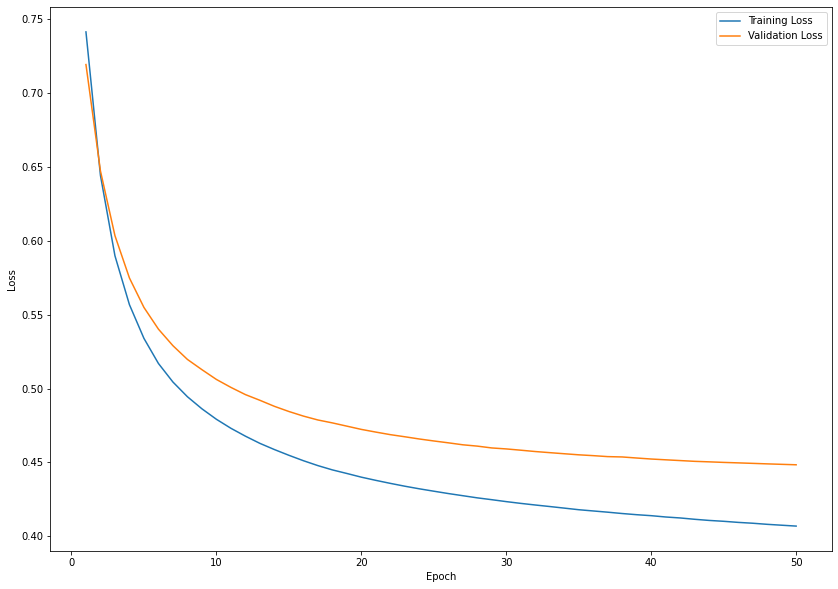

In [670]:
plt.figure(figsize=(14, 10))

epochs_range = range(1, epochs+1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [671]:
np.argmin(val_loss)

49

In [672]:
y_pred = np.squeeze(model.predict(X_test))

result = RSquare()
result.update_state(y_test, y_pred)

print("R^2 Score:", result.result())

R^2 Score: tf.Tensor(0.11671507, shape=(), dtype=float32)


In [673]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.4610


0.4609859883785248

In [674]:
rmse = np.sqrt(((np.array(y_pred) - np.array(y_test)) ** 2).mean())
rmse

1.6047532969284806